# Neural network using TensorFlow

In [26]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
# import necessary packages

# Plot the figures inline, necessary only for Jupyter notebook
%matplotlib inline 

import os # miscelleaneous operating system interface
import numpy as np  # import numpy
import pandas as pd # import pandas
import matplotlib.pyplot as plt 
import seaborn as sns # import seaborn for data visualization

from sklearn.metrics import root_mean_squared_error as RMSE # calculate RMSE
from sklearn.model_selection import train_test_split # splitting data into training and testing set

In [28]:
# import the data set for drugs

df_drug=pd.read_csv('GDSC2_label_14drugs.csv') # load the data set for drugs (limited to 14 drugs)
df_drug.set_index('Unnamed: 0', inplace=True)

# print(df_drug.shape) # shape for drug data

# Result: 805 tumor cells (cell lines) and 14 drugs
# df_drug.head(5) # print the first 5 instances to have a look

# We only focus on the 3 drugs with largest variances in their efficacies among different drugs
drug_sort=df_drug.std().sort_values(ascending = False).iloc[0:3]

# import the data set for tumor cells (cell lines) and genes

df_tumor=pd.read_csv('GDSC2_expression14.csv') # load the data set for tumors and cell lines
df_tumor.set_index('Unnamed: 0', inplace=True)
gene=list(df_tumor.columns)

# print('Number of genes:', len(gene))
# print('First gene: ',gene[0])

# print('Shape of data frame', df_tumor.shape) # shape for tumor data
# df_tumor.iloc[0:5, 0:10] # print the first 5 instances to have a look, only print the first 10 columns

# Result: 805 tumor cells (instances) and 17419 genes (features)

In [29]:
# The 3 drugs with the largest variances among all 805 tumors
# See EDA and overfitting notebook

drug1=drug_sort.index[0] # 'Docetaxel'
drug2=drug_sort.index[1] # 'Trametinib'
drug3=drug_sort.index[2] # 'Entinostat'

# Merge the two data set together WITHOUT any selection of features
# We do not need to save too many decimal places, keep 2 decimal places is fine
# The last column becomes the drug efficacy

df_1=pd.concat([df_tumor, df_drug[drug1].round(2)], axis=1) # axis=1 because we join the columns, not rows
df_2=pd.concat([df_tumor, df_drug[drug2].round(2)], axis=1) 
df_3=pd.concat([df_tumor, df_drug[drug3].round(2)], axis=1) 

# print(df_1.shape)
# df_1.head(5)

In [57]:
# Calculate variance for each gene across the 805 samples
# Select the 50 genes with highest variance (after normalization)

from sklearn.preprocessing import normalize # normalize the columns for the genes

n=50 # number of genes to keep

df_tumor_norm=pd.DataFrame(normalize(df_tumor, axis=0)) # result after normalization is a numpy array, we need data frame
df_tumor_norm.columns=gene # assign the gene name as column names

# calculate the variance for each gene type across 805 samples and sort the results
df_tumor_var=pd.DataFrame(df_tumor_norm.var())
df_tumor_var.columns=['normed var']

# Comments: There are many genes having small variances across different types of tumor cells. 
# Again, doesn't mean that they have no importance in drug efficacy!

# Picking the 50 genes with the largest variances across all tumor types

df_var=df_tumor_var.sort_values('normed var',ascending = False).iloc[0:n,:]
df_var.index # This list stores the names of that 50 genes
# df_var

Index(['RPS4Y1', 'HLA-DRA', 'ITM2A', 'MIR205HG', 'TACSTD2', 'SPP1', 'TSPAN8',
       'LAPTM5', 'TFF1', 'GMFG', 'COL1A2', 'KRT6A', 'LUM', 'S100A9', 'BEX1',
       'SRGN', 'CD53', 'IGJ', 'POU2AF1', 'S100A14', 'TFF3', 'S100P', 'GTSF1',
       'AKR1B10P1', 'COL3A1', 'C8orf4', 'UCA1', 'INSM1', 'GPX2', 'LCN2',
       'CEACAM5', 'MMP7', 'PCP4', 'CD52', 'LYZ', 'AKR1C2', 'FGFBP1', 'GRP',
       'PHGR1', 'MMP1', 'SCG2', 'RAB25', 'CXCR4', 'COL6A3', 'KRT5', 'POSTN',
       'BCL2A1', 'INHBB', 'CCL2', 'ANXA10'],
      dtype='object')

In [31]:
import tensorflow as tf

from tensorflow import keras
from keras import Model
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

1. For Docetaxel

Epoch 1/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - RootMeanSquaredError: 0.7439 - loss: 0.5538
Epoch 2/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - RootMeanSquaredError: 0.7106 - loss: 0.5054
Epoch 3/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - RootMeanSquaredError: 0.6795 - loss: 0.4622
Epoch 4/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - RootMeanSquaredError: 0.6687 - loss: 0.4476
Epoch 5/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - RootMeanSquaredError: 0.6649 - loss: 0.4421
Epoch 6/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - RootMeanSquaredError: 0.6503 - loss: 0.4237
Epoch 7/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - RootMeanSquaredError: 0.6531 - loss: 0.4269
Epoch 8/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - RootMeanSquaredError: 0.6303 - loss: 0.3974
Epoch 9/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - RootMeanSquaredError: 0.6196 - loss: 0.3848
Epoch 10/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - RootMeanSquaredError: 0.6080 - loss: 0.3697
Epoch 11/

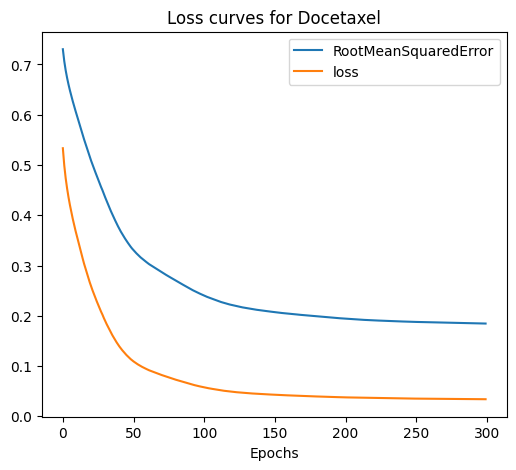

In [67]:
# 20% of the data is used as test set, meaning 161 cell lines are saved for the test set
df_train_1, df_test_1 = train_test_split(df_1, shuffle=True, random_state=42, test_size=.2) # For Docetaxel

scaler = make_column_transformer((StandardScaler(), df_var.index), remainder='passthrough')
scaler.fit(df_train_1)
scaler.transform(df_train_1)
scaler.transform(df_test_1)

# Try 2 hidden layer and same network for all 3 types of drugs

model = keras.models.Sequential([
    Dense(10,activation='tanh'),
    Dense(5,activation='tanh'),
    Dense(1, activation='linear')
])

# Use Adam optimizer, learning rate 0.00001, RMSE for metrics

model.compile(loss = "mean_squared_error", optimizer = Adam(learning_rate=0.00005), metrics=['RootMeanSquaredError'])
history = model.fit(df_train_1[df_var.index], df_train_1.iloc[:,-1:], epochs=300)

y_pred_test1 = model.predict(df_test_1[df_var.index])

print(f"RMSE for test set for {drug1}:", np.round(RMSE(df_test_1.iloc[:,-1:], y_pred_test1),3))

pd.DataFrame(history.history).plot(figsize=(6,5))
plt.xlabel("Epochs")
plt.title(f'Loss curves for {drug1}')
plt.legend();